<h1>Lab Tuesday (wednesday below)</h>

<h3>Loading libraries and packages</h>

In [66]:
import statistics as stats
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

<h3>Loading the data into the notebook</h>

In [68]:
df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3x.csv')
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


<h3>Using the np.number function to seperate the numeric columns into a new dataframe</h>


In [69]:
numericals_df = df.select_dtypes(include = np.number)
numericals_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


<h3>Seperating the x and the y values</h>

In [70]:
X = numericals_df.drop('total_claim_amount', axis=1)
y = numericals_df.total_claim_amount

<h3>Looking at the columns in the data frame</h>

In [71]:
numericals_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [72]:
X.isna().any()

customer_lifetime_value          False
income                           False
monthly_premium_auto             False
months_since_last_claim          False
months_since_policy_inception    False
number_of_open_complaints        False
number_of_policies               False
dtype: bool

<h3>Train-Test split</h>

In [73]:
RAND_STATE = 100 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
861,5908,86277,74,19,33,0,3
9053,2397,22283,65,16,93,0,1
9515,5296,96510,73,33,44,0,3


<h3>Scaling the data (fit and transform of the train data and transform the test data)</h>

In [76]:
ss = StandardScaler()
#transforming the x - train data using the standard scaler
train_transformed=ss.fit_transform(X_train)

In [77]:
#transforming the x - test using the standard scaler
test_transformed=ss.transform(X_test)

<h3>Adding a constant and predictive modelling (OLS)</h>

In [78]:
X_train_const_ct = sm.add_constant(X_train.to_numpy()) # adding a constant

In [79]:
model = sm.OLS(y_train, X_train_const_ct).fit()
predictions_train = model.predict(X_train_const_ct)

X_test_const_ct = sm.add_constant(X_test) # adding a constant
predictions_test = model.predict(X_test_const_ct)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     737.9
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:09:09   Log-Likelihood:                -51128.
No. Observations:                7482   AIC:                         1.023e+05
Df Residuals:                    7474   BIC:                         1.023e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1492     11.584     -0.358      0.7

<h3>Model fitting</h>

In [80]:
model=LinearRegression()    # model
model.fit(train_transformed, y_train)

LinearRegression()

<h3>Model parameters</h>

In [81]:
model.coef_

array([ -6.1418607 , -31.72677744, 186.29158041,   1.66182273,
        -1.47924562,  -2.21387573,   3.24168968])

In [82]:
model.intercept_

434.8695535952954

<h3>Making predictions</h>

In [83]:
y_pred = pd.DataFrame(model.predict(test_transformed),columns = ['total_claim_amount'])
y_pred_train =  pd.DataFrame(model.predict(train_transformed),columns = ['total_claim_amount'])

In [84]:
#y_pred
y_pred_train

,total_claim_amount
0,290.948792
1,320.293686
2,274.626978
3,319.663518
4,388.079559
...,...
7477,270.918108
7478,523.795139
7479,310.088394
7480,483.675347


<h1>Lab Wednesday</h>

<h3>Evaluating model performance</h>

<AxesSubplot:>

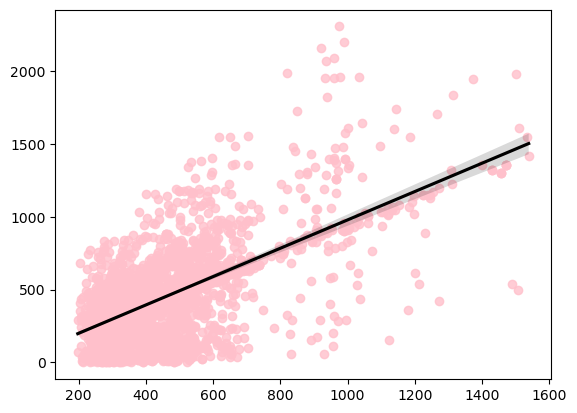

In [85]:
yp_ = y_pred.to_numpy()
yt_ = y_test.to_numpy()
sns.regplot(yp_,yt_,scatter_kws={"color": "pink"}, line_kws={"color": "black"})

<h3>Error Metrics</h>

In [86]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))
##prediction on the train set
print(mse(y_train,y_pred_train))

50661.021566839234
152.90695179363988
50466.29164229992


In [87]:
X = X_train.transpose()

In [88]:
R2=r2_score(y_test,y_pred)
R2

0.4117569034386489

In [89]:
R2_test=model.score(test_transformed,y_test)
R2_train=model.score(train_transformed,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.41046971941991517

<h3>Feature Importances</h>

In [90]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
2,monthly_premium_auto,186.291580
1,income,31.726777
0,customer_lifetime_value,6.141861
6,number_of_policies,3.241690
5,number_of_open_complaints,2.213876
3,months_since_last_claim,1.661823
4,months_since_policy_inception,1.479246


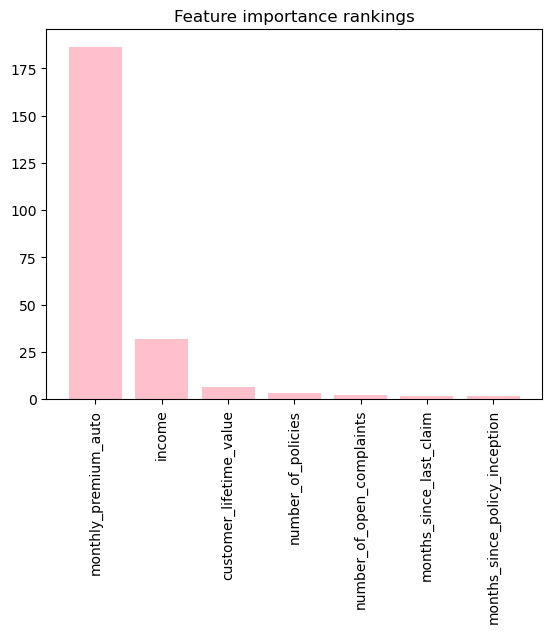

In [91]:
plt.bar(x=features_importances['Attribute'].iloc[:10], height=features_importances['Importance'].iloc[:10], color='pink')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()

<h3>Seperating categorical columns from the data frame</h>

In [92]:
#seperating the categorical columns from the numerical and storing it in a new variable
categorical = df.select_dtypes(include = np.object)
categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


<h3>Checking correlation</h>

In [93]:
df.corr()
#correlation not high enough to decide on dropping any columns

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


<h3>Label encoding</h>

In [94]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

categorical.coverage = le.fit_transform(categorical.coverage)
categorical.education = le.fit_transform(categorical.education)
categorical.vehicle_class = le.fit_transform(categorical.vehicle_class)
categorical.vehicle_size = le.fit_transform(categorical.vehicle_size)

<h3>Drop column</h>

In [95]:
categorical=categorical.drop(['effective_to_date'], axis=1)

<h3>One hot encoding</h>

In [96]:
categorical = pd.get_dummies(categorical, prefix = ['month', 'region','response', 'employment_status', 'gender', 'location_code', 'policy_type', 'marital_status','policy', 'renew_offer_type', 'sales_channel'], columns = ['month', 'region','response', 'employment_status', 'gender', 'policy_type', 'location_code', 'marital_status', 'policy', 'renew_offer_type', 'sales_channel'], drop_first=False)

In [97]:
categorical

,coverage,education,vehicle_class,vehicle_size,month_feb,month_jan,region_central,region_east,region_north west,region_west region,...,policy_special l2,policy_special l3,renew_offer_type_offer1,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web
0,0,1,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,0,0,4,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1,1,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,2,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2,0,1,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
10685,0,1,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
10686,1,0,2,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
10687,2,1,4,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [98]:
df = pd.concat([categorical, numericals_df], axis = 1)

In [99]:
from scipy.stats import iqr
def remove_outliers(df):
    for c in df.columns:
            pct_75 = np.percentile(df[c], 75)
            pct_25 = np.percentile(df[c], 25)
            upper_bound = pct_75 + 1.5*iqr(df[c])
            lower_bound = pct_25 - 1.5*iqr(df[c])
            condition = (df[c] < upper_bound) & (df[c] > lower_bound)
            df[c] = df[c][condition]  # Filter out the outliers
    return df

,coverage,education,vehicle_class,vehicle_size,month_feb,month_jan,region_central,region_east,region_north west,region_west region,...,policy_special l2,policy_special l3,renew_offer_type_offer1,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web
0,0,1,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,0,0,4,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1,1,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,2,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2,0,1,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
10685,0,1,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
10686,1,0,2,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
10687,2,1,4,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [100]:
Xx = df.drop('total_claim_amount', axis=1)
yy = df.total_claim_amount

In [101]:
RAND_STATE = 100 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

In [102]:
X_train, X_test, y_train, y_test = train_test_split(Xx, yy, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train

,coverage,education,vehicle_class,vehicle_size,month_feb,month_jan,region_central,region_east,region_north west,region_west region,...,sales_channel_branch,sales_channel_call center,sales_channel_web,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
861,0,3,0,1,1,0,1,0,0,0,...,0,0,0,5908,86277,74,19,33,0,3
9053,0,3,0,1,0,1,0,0,0,1,...,1,0,0,2397,22283,65,16,93,0,1
9515,0,4,0,0,0,1,0,0,1,0,...,1,0,0,5296,96510,73,33,44,0,3
9433,0,1,5,2,1,0,0,0,0,1,...,0,0,0,16510,31356,68,25,13,0,2
3493,1,0,5,0,0,1,0,1,0,0,...,0,0,0,6293,45430,81,21,37,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,1,5,1,1,0,0,1,0,0,...,0,1,0,2476,47918,62,2,51,0,1
79,2,3,0,1,1,0,1,0,0,0,...,0,1,0,9312,75986,115,11,44,0,3
8039,0,3,5,1,1,0,0,0,1,0,...,0,1,0,6945,15850,61,28,14,0,2
6936,0,3,4,0,0,1,0,0,1,0,...,1,0,0,8718,89096,111,1,50,0,3


In [103]:
ss = StandardScaler()
#transforming the x - train data using the standard scaler
train_transformed=ss.fit_transform(X_train)

In [104]:
#transforming the x - test using the standard scaler
test_transformed=ss.transform(X_test)

In [105]:
X_train_const_ct = sm.add_constant(X_train.to_numpy()) # adding a constant

In [106]:
model = sm.OLS(y_train, X_train_const_ct).fit()
predictions_train = model.predict(X_train_const_ct)

X_test_const_ct = sm.add_constant(X_test) # adding a constant
predictions_test = model.predict(X_test_const_ct)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     633.4
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:09:10   Log-Likelihood:                -47620.
No. Observations:                7482   AIC:                         9.532e+04
Df Residuals:                    7442   BIC:                         9.560e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.1893      1.993    -12.641      0.0

In [107]:
model=LinearRegression()    # model
model.fit(train_transformed, y_train)

LinearRegression()

In [108]:
model.coef_

array([-3.80972574e+00,  8.16478820e-01, -5.16139819e+00,  1.20565654e+00,
        2.67716031e+15,  2.67716031e+15, -1.22419384e+15, -7.64680991e+14,
       -1.21679362e+15, -1.28285244e+15, -4.07302061e+14, -4.07302061e+14,
       -9.98508501e+14, -2.31076476e+15, -9.85981050e+14, -8.14243113e+14,
       -2.08162328e+15,  2.20126691e+15,  2.20126691e+15,  1.71300349e+15,
       -3.29157411e+15, -1.33579720e+15, -8.60585357e+14, -1.04834672e+15,
       -8.23420788e+14,  5.49976061e+14,  7.60907029e+14,  6.87623339e+14,
       -3.40784349e+15, -4.37392912e+15, -5.49709206e+15, -2.02877097e+15,
       -2.48938135e+15, -2.83744730e+15, -5.84311221e+14, -8.26474334e+14,
       -8.33277364e+14,  1.11404103e+15,  1.04825282e+15,  8.29343896e+14,
        7.11864947e+14, -1.92250542e+15, -1.78713346e+15, -1.56908242e+15,
       -1.42099513e+15,  0.00000000e+00, -5.50000000e+00,  1.74750000e+02,
        3.46875000e+00,  3.75000000e-01, -3.40625000e+00,  4.75000000e+00])

<AxesSubplot:>

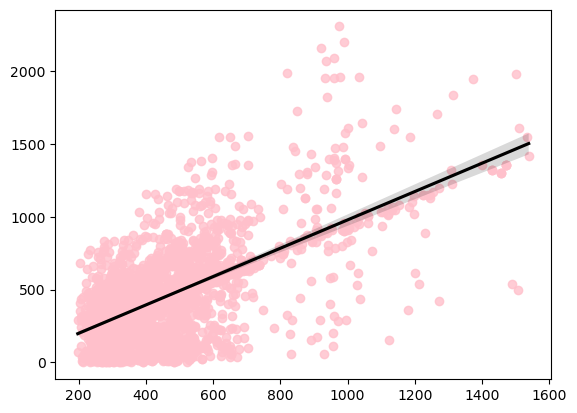

In [109]:
yp_ = y_pred.to_numpy()
yt_ = y_test.to_numpy()
sns.regplot(yp_,yt_,scatter_kws={"color": "pink"}, line_kws={"color": "black"})

In [110]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))
##prediction on the train set
print(mse(y_train,y_pred_train))

50661.021566839234
152.90695179363988
50466.29164229992


In [111]:
R2=r2_score(y_test,y_pred)
R2

0.4117569034386489

In [112]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
30,policy_corporate l3,5.497092e+15
29,policy_corporate l2,4.373929e+15
28,policy_corporate l1,3.407843e+15
20,location_code_personal auto,3.291574e+15
33,policy_personal l3,2.837447e+15
...,...,...
50,number_of_open_complaints,3.406250e+00
3,vehicle_size,1.205657e+00
1,education,8.164788e-01
49,months_since_policy_inception,3.750000e-01


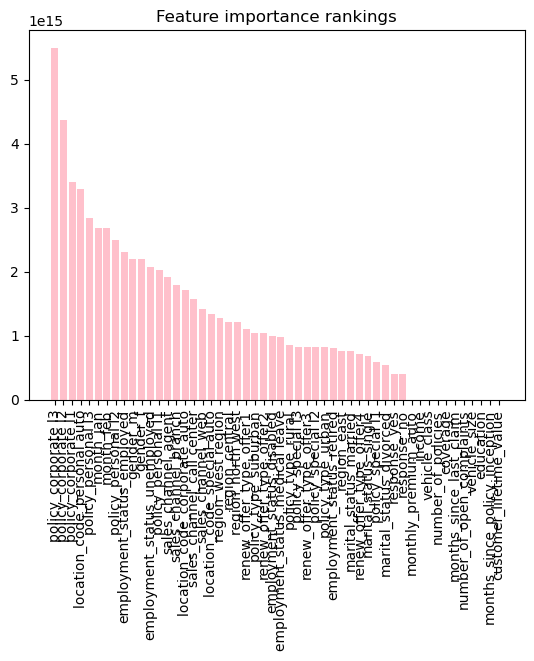

In [116]:
plt.bar(x=features_importances['Attribute'].iloc[:52], height=features_importances['Importance'].iloc[:52], color='pink')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()

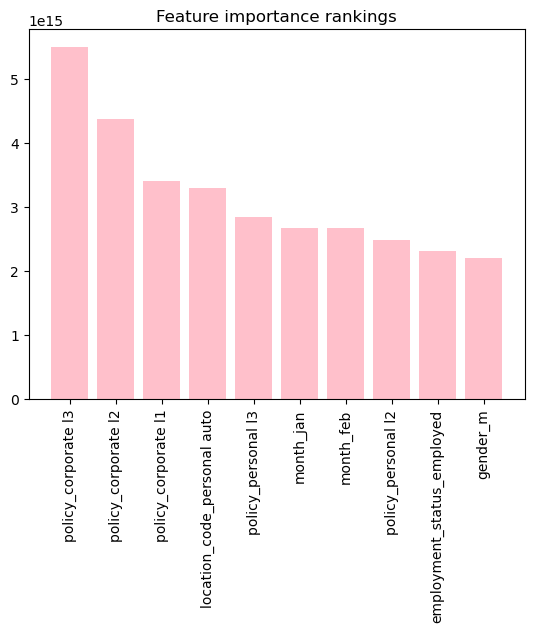

In [117]:
plt.bar(x=features_importances['Attribute'].iloc[:10], height=features_importances['Importance'].iloc[:10], color='pink')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()

In [3]:
df.to_csv('transformed_data.csv")

SyntaxError: EOL while scanning string literal (720685806.py, line 1)